In [32]:
"""Huffman code implementation"""

from dataclasses import dataclass, field

@dataclass(order=True)
class Node:
    frequency: int
    letters: set[str] = field(compare=False)
    left: 'Node' = field(compare=False)
    right: 'Node' = field(compare=False)

    def __str__(self) -> str:
        return f"{self.frequency}\n{str(self.letters)}"
    
    def is_leaf(self) -> bool:
        return not (self.left and self.right)
    
    @staticmethod
    def get_adjacency_dict(node: 'Node') -> dict[str, tuple[str]]:
        """Recursively build an adjacency dictionary of the Huffman tree for visualization."""
        if node.is_leaf():
            return {}
        
        my = {str(node): (str(node.left), str(node.right))}
        return my | Node.get_adjacency_dict(node.left) | Node.get_adjacency_dict(node.right)

In [33]:
from MinHeap import MinHeap

def build_huffman_tree(priority_queue: MinHeap) -> Node:
    if priority_queue.size() == 1:
        son = priority_queue.pop()
        root = Node(son.frequency, son.letters, son, son)
        return root
    while priority_queue.size() > 1:
        smallest = priority_queue.pop()
        second_smallest = priority_queue.pop()
        new_node = Node(frequency = smallest.frequency + second_smallest.frequency, 
                        letters = smallest.letters | second_smallest.letters, 
                        left = smallest, 
                        right = second_smallest)
        priority_queue.push(new_node)
    root = priority_queue.pop()
    return root

In [34]:
def encode_one_symbol(char: str, root: Node) -> str:
    encoded_s = ''
    node = root
    while not node.is_leaf():
        if char in node.left.letters:
            node = node.left
            encoded_s += '0'
        else:
            node = node.right
            encoded_s += '1'
    return encoded_s


def encode(s: str, root: Node) -> str:
    """Encode the input string s using the Huffman tree rooted at root."""
    encoded_s = ''
    for char in s:
        encoded_s += encode_one_symbol(char, root)
    return encoded_s


def decode(encoded_s: str, root: Node) -> str:
    """Decode the encoded string using the Huffman tree rooted at root."""
    decoded_s = ''
    iter_s = iter(encoded_s)
    node = root
    try:
        while True:
            if not node.is_leaf():
                node = node.left if next(iter_s) == '0' else node.right
            else:
                decoded_s += next(iter(node.letters))  # get the only letter of the node
                node = root
    except StopIteration:
        return decoded_s

In [35]:
from collections import defaultdict

def get_symbol_frequencies(s: str) -> dict[str, int]:
    """Get the frequency of each symbol in the input string."""
    frequencies = defaultdict(int)
    for char in s:
        frequencies[char] += 1
    return frequencies

In [36]:
def read_input() -> str:
    """Read input from file"""
    with open('../assets/huffman_code_input.txt', encoding='utf-8') as f:
        # sys.stdin = f
        return f.readline().strip()

In [37]:
s = read_input()
print(f"String: {s}")
frequencies = get_symbol_frequencies(s)
print(f"\nFrequencies: {frequencies}")

nodes = [Node(frequency, set(char), None, None) for char, frequency in frequencies.items()]
print(f"\nNodes:")

priority_queue = MinHeap()
for node in nodes:
    print(f"{node = }")
    priority_queue.push(node)

root = build_huffman_tree(priority_queue)
print(f"\nHuffman tree:  {root = }")

String: abacabad

Frequencies: defaultdict(<class 'int'>, {'a': 4, 'b': 2, 'c': 1, 'd': 1})

Nodes:
node = Node(frequency=4, letters={'a'}, left=None, right=None)
node = Node(frequency=2, letters={'b'}, left=None, right=None)
node = Node(frequency=1, letters={'c'}, left=None, right=None)
node = Node(frequency=1, letters={'d'}, left=None, right=None)

Huffman tree:  root = Node(frequency=8, letters={'c', 'd', 'b', 'a'}, left=Node(frequency=4, letters={'a'}, left=None, right=None), right=Node(frequency=4, letters={'d', 'c', 'b'}, left=Node(frequency=2, letters={'b'}, left=None, right=None), right=Node(frequency=2, letters={'c', 'd'}, left=Node(frequency=1, letters={'c'}, left=None, right=None), right=Node(frequency=1, letters={'d'}, left=None, right=None))))


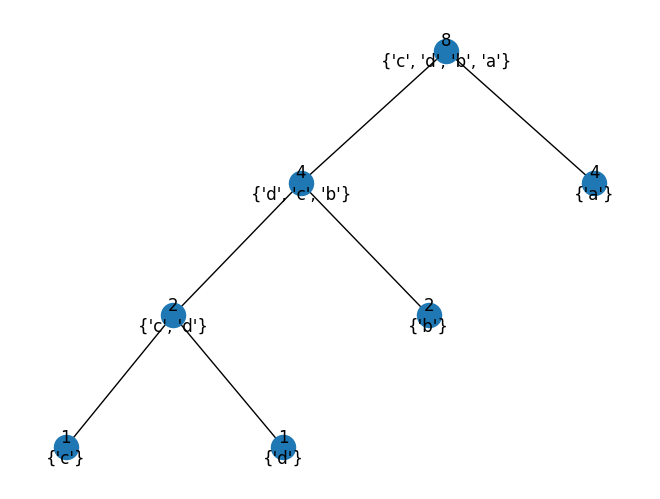

In [38]:
from draw_tree import draw_tree
adjacency_dict = Node.get_adjacency_dict(root)
draw_tree(adjacency_dict)

In [39]:
encoded_s = encode(s, root)
decoded_s = decode(encoded_s, root)
# print(decoded_s)

print(f"{len(frequencies)} {len(encoded_s)}")

for char, _ in frequencies.items():
    print(f"{char}: {encode_one_symbol(char, root)}")

print(encoded_s)

4 14
a: 0
b: 10
c: 110
d: 111
01001100100111
